In [17]:
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
import numpy as np # for getting our distribution
import seaborn as sns # for plotting
from scipy import stats # to compute statistics
import statsmodels.api as sm

In [18]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

In [19]:
df.head(10)

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,ES_02_0005,40.732830,-2.078003,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,ES_02_0006,40.788013,-2.152441,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
7,ES_02_0007,40.793682,-2.285236,Spain,Tejo,0,1,1,1,0,...,0,1,0,0,0,0,1,0,0,0
8,ES_02_0008,40.747652,-2.394504,Spain,Tejo,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,ES_02_0010,40.807161,-1.838133,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
list(df.columns)

['Site_code',
 'Latitude',
 'Longitude',
 'Country',
 'Catchment_name',
 'Galiza',
 'Subsample',
 'Calib_EFI_Medit',
 'Calib_connect',
 'Calib_hydrol',
 'Calib_morphol',
 'Calib_wqual',
 'Geomorph1',
 'Geomorph2',
 'Geomorph3',
 'Water_source_type',
 'Flow_regime',
 'Altitude',
 'Geological_typology',
 'Actual_river_slope',
 'Natural_sediment',
 'Elevation_mean_catch',
 'prec_ann_catch',
 'temp_ann',
 'temp_jan',
 'temp_jul',
 'Barriers_catchment_down',
 'Barriers_river_segment_up',
 'Barriers_river_segment_down',
 'Barriers_number_river_segment_up',
 'Barriers_number_river_segment_down',
 'Barriers_distance_river_segment_up',
 'Barriers_distance_river_segment_down',
 'Impoundment',
 'Hydropeaking',
 'Water_abstraction',
 'Hydro_mod',
 'Temperature_impact',
 'Velocity_increase',
 'Reservoir_flushing',
 'Sedimentation',
 'Channelisation',
 'Cross_sec',
 'Instream_habitat',
 'Riparian_vegetation',
 'Embankment',
 'Floodprotection',
 'Floodplain',
 'Toxic_substances',
 'Acidification',
 '

In [21]:
#  1. create a column with the total number of species present (species richness) in each sampling site

start_column = 1
columns_to_sum = df.columns[start_column:]

df['species_richness'] = df[columns_to_sum].sum(axis=1)

C:\Users\alfor\AppData\Local\Temp\ipykernel_35124\3000633524.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['species_richness'] = df[columns_to_sum].sum(axis=1)


In [22]:
print(df['species_richness'])

0       1553.483016
1       3626.131334
2       3532.207657
3       3386.572800
4       3309.326501
           ...     
5006    2069.477006
5007    2247.059872
5008    2154.291358
5009    2981.893730
5010    2459.108881
Name: species_richness, Length: 5011, dtype: float64


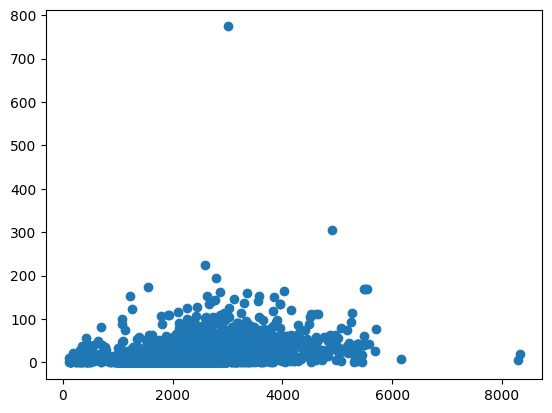

In [23]:
# 2. Linear regression relating the species richness with each one of the continuous environmental variables in the dataset
# tried the first example with the Actual_river_slope

x=df["species_richness"]
y=df["Actual_river_slope"]

# Execute a method that returns some important key values of Linear Regression:
slope, intercept, r, p, std_err = stats.linregress(x, y)

# plot data with fitted line
def myfunc(x):
  return intercept + slope * x # function that returns fitted values

mymodel = list(map(myfunc, x)) # apply function to each x value

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [24]:
x = sm.add_constant(x) # adding a constant (Intercept)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     Actual_river_slope   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 21 Apr 2023   Prob (F-statistic):                nan
Time:                        11:50:37   Log-Likelihood:                    nan
No. Observations:                5011   AIC:                               nan
Df Residuals:                    5009   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                   nan        nan  

In [26]:
#another way to do it

import statsmodels.api as sm

dependent_var = 'species_richness'  # Replace with the name of your dependent variable
exog_vars = ["Altitude", "Actual_river_slope","Elevation_mean_catch", "prec_ann_catch","temp_ann","temp_jan","temp_jul"]  # Replace with the names of your continuous environmental variables

# Loop through each exogenous variable and run a linear regression
for exog_var in exog_vars:
    # Extract the dependent variable and the exogenous variable
    y = df[dependent_var]
    X = df[exog_var]
    
    # Add a constant term to the exogenous variable for the intercept term
    X = sm.add_constant(X)
    
    # Fit the linear regression model
    model = sm.OLS(endog=y, exog=X)
    results = model.fit()
    
    # Print the results
    print(f"Linear Regression Results for '{dependent_var}' vs '{exog_var}':")
    print(results.summary())


Linear Regression Results for 'species_richness' vs 'Altitude':
                            OLS Regression Results                            
Dep. Variable:       species_richness   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     6952.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:51:33   Log-Likelihood:                -38701.
No. Observations:                5011   AIC:                         7.741e+04
Df Residuals:                    5009   BIC:                         7.742e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

MissingDataError: exog contains inf or nans

In [ ]:
# Multiple linear regression with the same data and check the differences between the previous univariate regression coefficients and new coefficients

df = df.fillna(df.mean())

y=df["species_richness"]
x=df[["Altitude", "Actual_river_slope","Elevation_mean_catch", "prec_ann_catch","temp_ann","temp_jan","temp_jul"]]

x = sm.add_constant(x) # adding a constant (Intercept)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       species_richness   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     2541.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:50:28   Log-Likelihood:                -37083.
No. Observations:                5011   AIC:                         7.418e+04
Df Residuals:                    5003   BIC:                         7.423e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.6128 

C:\Users\alfor\AppData\Local\Temp\ipykernel_35124\3591707625.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())
